In [11]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [156]:
def first_cheby_poly(x, n):
    '''Generate n-th order Chebyshev ploynominals of first kind.'''
    if n == 0: return 1
    elif n == 1: return x
    result = 2. * x * first_cheby_poly(x, 1) - first_cheby_poly(x, 0)
    m = 0
    while n - m > 2:
        result = 2. * x * result - first_cheby_poly(x, m+1)
        m += 1
    return result
    
def reduced_T(T, T_min, T_max):
    '''Calculate the reduced temperature.'''
    T=float(T)
    T_min=float(T_min)
    T_max = float(T_max)
    T_tilde = 2.0 * T ** (-1) - T_min ** (-1) - T_max ** (-1)
    T_tilde /= (T_max ** (-1) - T_min ** (-1))
    return T_tilde
        
def reduced_P(P, P_min, P_max):
    '''Calculate the reduced pressure.'''
    P_tilde = 2.0 * np.log(P) - np.log(P_min) - np.log(P_max)
    P_tilde /= (np.log(P_max) - np.log(P_min))
    return P_tilde
        
def fit_cheby_poly(n_T, n_P, k, T_ls, P_ls):
    '''Fit the Chebyshev polynominals to rate constants.
          Input rate constants vector k should be arranged based on pressure.'''
    cheb_mat = np.zeros((len(k), n_T * n_P))
    for n, P in enumerate(P_ls):       # !! assume that at each presssure, we have the same temperateure range
        P_min = P_ls[0]
        P_max = P_ls[-1]
        for m, T in enumerate(T_ls):
            T_min = T_ls[0]
            T_max = T_ls[-1]
            for i in range(n_P):
                P_tilde = reduced_P(P, P_min, P_max)
                P_cheb = first_cheby_poly(P_tilde, i)
                for j in range(n_T):
                    T_tilde = reduced_T(T, T_min, T_max)
                    T_cheb = first_cheby_poly(T_tilde, j)
                    cheb_mat[n*len(T_ls)+m, i*n_T+j] = P_cheb * T_cheb
                        
    coef = np.linalg.pinv(cheb_mat)
    coef = np.dot(coef, k)
    return coef

In [157]:
gas = ct.Solution('glarborg_custom.cti')
k = [[],[],[]]
temperature=[[],[],[]]
for i,pressure in enumerate([.1,5,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[27]*1000)
        temperature[i].append(temp)



**** WARNING ****
For species HOCHO, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1679


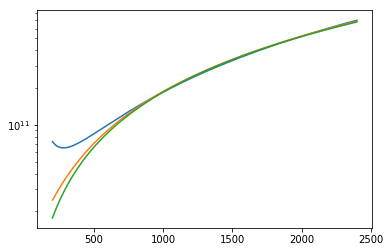

In [158]:
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])


In [159]:
k_combined=np.log10(np.array(k[0]+k[1]+k[2]))
temp_combined=temperature[0]
pressure_combined = [.1,5,10]
len(k_combined)
len(temp_combined)

2201

In [174]:
coef = fit_cheby_poly(15,3,k_combined,temp_combined,pressure_combined)

In [175]:
coef.reshape(3,15).T


array([[ 1.09531233e+01, -1.28976271e-01, -2.42903801e-02],
       [ 5.16633847e-01,  1.62640103e-01,  2.48811078e-02],
       [ 2.26907863e-01, -2.46508973e-02, -2.47824391e-03],
       [ 8.34972190e-02, -9.07100062e-03, -9.11940519e-04],
       [ 3.45675437e-02, -3.75536113e-03, -3.77540045e-04],
       [ 1.52619383e-02, -1.65803189e-03, -1.66687946e-04],
       [ 7.02186978e-03, -7.62844392e-04, -7.66915073e-05],
       [ 3.31873614e-03, -3.60542039e-04, -3.62465959e-05],
       [ 1.60569928e-03, -1.74440530e-04, -1.75371378e-05],
       [ 7.82780357e-04, -8.50399714e-05, -8.54937607e-06],
       [ 3.93662776e-04, -4.27668769e-05, -4.29950891e-06],
       [ 1.89689965e-04, -2.06076060e-05, -2.07175720e-06],
       [ 1.04655540e-04, -1.13696059e-05, -1.14302762e-06],
       [ 3.81952098e-05, -4.14946481e-06, -4.17160710e-07],
       [ 4.23127325e-05, -4.59678570e-06, -4.62131503e-07]])



**** WARNING ****
For species HOCHO, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1679


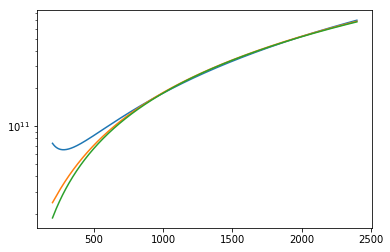

In [177]:
gas = ct.Solution('cheby_pressure_test.cti')
k2 = [[],[],[]]
temperature2=[[],[],[]]
for i,pressure in enumerate([.1,5,9]):
    for temp in np.arange(200,2400): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k2[i].append(gas.forward_rate_constants[0]*1000)
        temperature2[i].append(temp)
#plt.figure()
plt.semilogy(temperature2[0],k2[0])
plt.semilogy(temperature2[1],k2[1])
plt.semilogy(temperature2[2],k2[2])

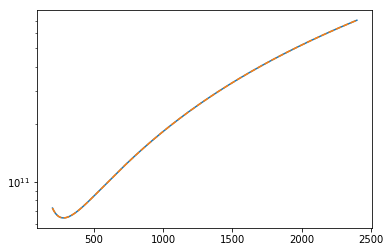

In [178]:
plt.semilogy(temperature[0],k[0])
#plt.semilogy(temperature[1],k[1])
#plt.semilogy(temperature[2],k[2])

plt.semilogy(temperature2[0],k2[0],'--')
#plt.semilogy(temperature2[1],k2[1],'--')
#plt.semilogy(temperature2[2],k2[2],'--')